# All in one

In this notebook we assemble all of the ingredients into one model.

In [1]:
# we start with importing all necessary components
%matplotlib inline

import numpy as np
from numpy import sin, cos, pi

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

from scipy.stats import rankdata, norm
from scipy.interpolate import griddata

# FastPM related libraries to work with snapshots
from nbodykit.source.catalog.file import BigFileCatalog
from nbodykit.source.mesh import BigFileMesh

from nbodykit.cosmology import Planck15
from nbodykit.cosmology import EHPower

from nbodykit.lab import *
from nbodykit import setup_logging, style

from skimage import measure

from reionprimer import *

/home/kaurov/anaconda3/envs/cfastpm/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
N=256
boxsize=10
 
q = get_snapshot(fname = 'fastpm', a = 0.1250, N = 256)
halo_field_m = get_halo_field(fname = 'fastpm', a = 0.1250, N = 256, boxsize=10., filt_mass=1e7, f = lambda x: np.sqrt(x))

sm_scales=np.array([1,2,4,8,16,32,64,128,256])
halo_field = halo_field_m + q*1e-2
trajectories = get_trajectories(halo_field, sm_scales=sm_scales, filter_mode='gaussian', normalization='rankorder')

def r_barrier(s, v):
    return v-4*(np.log10(s)-.6)**2

h_field = apply_reverse_barrier(trajectories=trajectories, sm_scales=sm_scales, boxsize=boxsize, r_barrier= r_barrier)

z_list = np.linspace(15,5,100)
f_list = reion_history(z_list)
f_field, z_field = convert_to_h_field(h_field, z_list, f_list)

deflection_potential = generate_deflection_potential(N, q=q, q_factor=1e-20, mode='gaussian', parameters=[3])
grad0, grad1, grad2 = deflection_vector(h_field)
h_field_distorted = perturb_field(h_field, grad0, grad1, grad2, deflection_potential, interpolation_method = 'nearest', n_steps=10, dt=.35)



Reading snapshot: fastpm_0.1250
Reading halos from: fastpm_0.1250/fof/0.200/


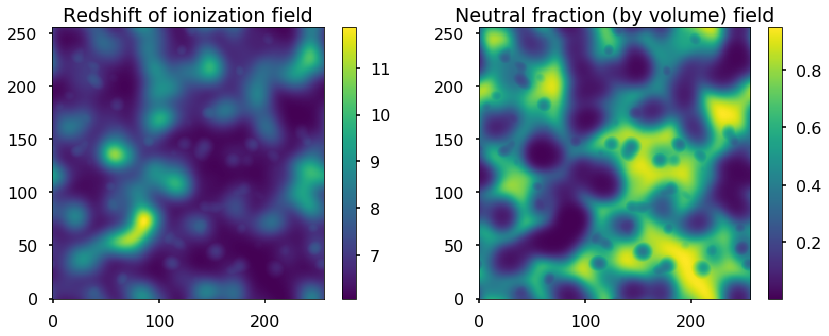

In [3]:

plt.figure(figsize=(14,5))
plt.subplot(121)
plt.imshow(z_field[:,:,0], origin='lower')
plt.title('Redshift of ionization field')
plt.colorbar()
plt.subplot(122)
plt.imshow(f_field[:,:,0], origin='lower')
plt.title('Neutral fraction (by volume) field')
plt.colorbar()

Text(0.5,1,'Redshift of ionization field')

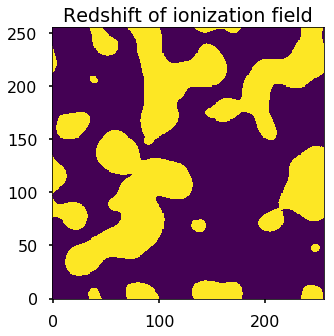

In [4]:

plt.figure(figsize=(14,5))
plt.subplot(121)
plt.imshow(z_field[:,:,0]>7.4, origin='lower')
plt.title('Redshift of ionization field')
# plt.colorbar()

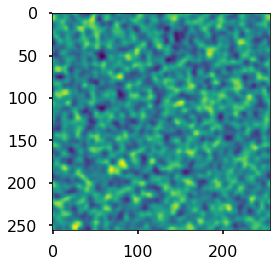

In [5]:

plt.imshow(deflection_potential[0,:,:])

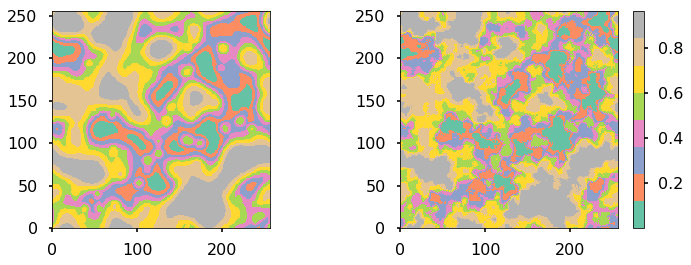

In [9]:

plt.figure(figsize=(12,4))

ax = plt.subplot(121)
plt.pcolor(h_field[0,:,:],cmap='Set2')
plt.axis('equal')
plt.gca().set_adjustable('box-forced')

plt.subplot(122, sharex=ax,sharey=ax)
plt.pcolor(h_field_distorted[0,:,:],cmap='Set2')
plt.axis('equal')
plt.gca().set_adjustable('box-forced')

plt.colorbar()




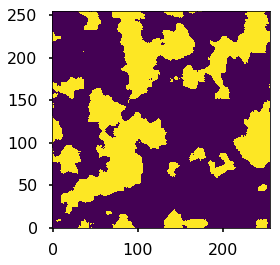

In [11]:
plt.imshow(h_field_distorted[:,:,0]>0.75, origin='lower')